<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%204/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Model Development

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Develop prediction models


<p>In this section, we will develop several models that will "avg_price" of the cryptocurrency using the other cryptocurrencies. This is just an estimate but should give us an objective idea of how much the cryptocurrency should cost.</p>


Some questions we want to ask in this module

<ul>
    <li>How good are models in predicting <b>avg_price</b></li>
</ul>
<p>In data analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>


<h4>Setup</h4>


Import libraries:


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [1]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
import piplite
await piplite.install(["pandas"])
await piplite.install(["matplotlib"])
await piplite.install(["scipy"])
await piplite.install(["seaborn"])
await piplite.install(["scikit-learn"])

If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [2]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3-y
#! mamba install numpy=1.21.2-y
#! mamba install sklearn=0.20.1-y

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

This function will download the dataset into your browser


In [4]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

This dataset was hosted on IBM Cloud object. Click <a href="https://asset-library.skills.network/quicklabs/IND-GPXX0N8QEN">HERE</a> for free storage.


In [81]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0N8QEN"

you will need to download the dataset; if you are running locally, please comment out the following


We will download the most correlated cryptocurrencies to <b>APEBUSD_avg_price</b>

In [82]:
#you will need to download the dataset; if you are running locally, please comment out the following 
currs = ["APEBUSD", "BTCBUSD", "ETHBUSD", "XRPBUSD", "DOGEBUSD"]
for curr in currs:
    await download(f"{path}/{curr}_trades_1m.csv", f"{curr}_trades_1m.csv")

Load the data and store it in dataframe `df`:


In [83]:
df = pd.read_csv(f"{currs[0]}_trades_1m.csv", index_col=0)
df = df[["ts", "avg_price"]]
df["ts"] = df["ts"].astype("datetime64[ns]")
df = df.rename(columns={"avg_price": f"{currs[0]}_avg_price"})

for curr in currs[1:]:
    temp_df = pd.read_csv(f"{curr}_trades_1m.csv", index_col=0)
    # Explain
    temp_df = temp_df[["ts", "avg_price"]]
    temp_df["ts"] = temp_df["ts"].astype("datetime64[ns]")
    temp_df = temp_df.rename(columns={"avg_price": f"{curr}_avg_price"})
    df = df.merge(temp_df, left_on="ts", right_on="ts")

In [84]:
df.head()

,ts,APEBUSD_avg_price,BTCBUSD_avg_price,ETHBUSD_avg_price,XRPBUSD_avg_price,DOGEBUSD_avg_price
0,2022-11-11 14:38:00,3.084732,16516.807793,1213.655402,0.369150,0.080926
1,2022-11-11 14:39:00,3.069644,16473.844114,1210.132181,0.367978,0.080565
2,2022-11-11 14:40:00,3.071029,16478.644495,1210.617423,0.367303,0.080577
3,2022-11-11 14:41:00,3.084393,16516.504443,1215.029038,0.367660,0.080715
4,2022-11-11 14:42:00,3.088095,16527.093981,1216.557003,0.368224,0.081038


<h2>1. Linear Regression and Multiple Linear Regression</h2>


<h4>Linear Regression</h4>


<p>One example of a Data  Model that we will be using is:</p>
<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$


<b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


<h4>Let's load the modules for linear regression:</h4>


In [85]:
from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object:</h4>


In [86]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could "BTCBUSD_avg_price" help us predict "APEBUSD_avg_price"?</h4>


For this example, we want to look at how <b>BTCBUSD_avg_price</b> can help us predict <b>APEBUSD_avg_price</b>.
Using simple linear regression, we will create a linear function with <b>BTCBUSD_avg_price</b> as the predictor variable and <b>APEBUSD_avg_price</b> as the response variable.


In [87]:
X = df[["BTCBUSD_avg_price"]]
Y = df["APEBUSD_avg_price"]

Fit the linear model using <b>BTCBUSD_avg_price</b>:


In [88]:
lm.fit(X,Y)

LinearRegression()

We can output a prediction:


In [89]:
Yhat=lm.predict(X)
Yhat[0:5]

array([3.42183204, 3.39371924, 3.39686031, 3.42163354, 3.42856269])

<h4>What is the value of the intercept (a)?</h4>


In [90]:
lm.intercept_

-7.385755590359683

<h4>What is the value of the slope (b)?</h4>


In [91]:
lm.coef_

array([0.00065434])

<h3>What is the final estimated linear model we get?</h3>


As we saw above, we should get a final linear model with the structure:


$$
Yhat = a + b  X
$$


Plugging in the actual values we get:


<b>APEBUSD_avg_price</b> = -7.385755590359683 + 0.00065434 x <b>BTCBUSD_avg_price</b>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 a): </h1>

<b>Create a linear regression object called "lm1".</b>

</div>


In [92]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
lm1 = LinearRegression()
lm1
```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1 b): </h1>

<b>Train the model using "DOGEBUSD_avg_price" as the independent variable and "APEBUSD_avg_price" as the dependent variable?</b>

</div>


In [93]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
lm1.fit(df[["DOGEBUSD_avg_price"]], df[["APEBUSD_avg_price"]])
lm1
```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 c):</h1>

<b>Find the slope and intercept of the model.</b>

</div>


<h4>Slope</h4>


In [94]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# Slope 
lm1.coef_
```

</details>


<h4>Intercept</h4>


In [95]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# Intercept
lm1.intercept_
```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 d): </h1>

<b>What is the equation of the predicted line? Assign the equation to y_hat variable.</b>

</div>


In [96]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
y_hat= 1.6492777 + 22.38847838*df["DOGEBUSD_avg_price"]

```

</details>


<h4>Multiple Linear Regression</h4>


<p>What if we want to predict <b>APEBUSD_avg_price</b> using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>


$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$


The equation is given by:


$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


<p>From the previous section  we know that other good predictors of <b>APEBUSD_avg_price</b> could be:</p>
<ul>
    <li><b>BTCBUSD_avg_price</b></li>
    <li><b>ETHBUSD_avg_price</b></li>
    <li><b>XRPBUSD_avg_price</b></li>
    <li><b>DOGEBUSD_avg_price</b></li>
</ul>


Let's calculate a correlation between these cryptocurrencies

In [97]:
df.corr(numeric_only=True)

,APEBUSD_avg_price,BTCBUSD_avg_price,ETHBUSD_avg_price,XRPBUSD_avg_price,DOGEBUSD_avg_price
APEBUSD_avg_price,1.000000,0.583047,0.530478,0.412795,0.549660
BTCBUSD_avg_price,0.583047,1.000000,0.881003,0.295278,0.364330
ETHBUSD_avg_price,0.530478,0.881003,1.000000,0.470743,0.617713
XRPBUSD_avg_price,0.412795,0.295278,0.470743,1.000000,0.801807
DOGEBUSD_avg_price,0.549660,0.364330,0.617713,0.801807,1.000000


Let's develop a model using these variables as the predictor variables.

In [98]:
Z = df[["BTCBUSD_avg_price", "ETHBUSD_avg_price", "XRPBUSD_avg_price", "DOGEBUSD_avg_price"]]

Fit the linear model using the four above-mentioned variables.


In [99]:
lm.fit(Z, df["APEBUSD_avg_price"])

LinearRegression()

What is the value of the intercept(a)?


In [100]:
lm.intercept_

-8.97307357003211

What are the values of the coefficients (b1, b2, b3, b4)?


In [101]:
lm.coef_

array([ 1.20723485e-03, -7.61639078e-03, -3.12506896e+00,  3.22544603e+01])

What is the final estimated linear model that we get?


As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

What is the linear function we get in this example?


<b>APEBUSD_avg_price</b> = -8.97307357003211 + 0.00120723485 x <b>BTCBUSD_avg_price</b> - 0.00761639078 x <b>ETHBUSD_avg_price</b> - 3.12506896 x <b>XRPBUSD_avg_price</b> + 32.2544603 x <b>DOGEBUSD_avg_price</b>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2 a): </h1>
<b>Create and train a Multiple Linear Regression model "lm2" where the response variable is APEBUSD_avg_price, and the predictor variable is ETHBUSD_avg_price and  XRPBUSD_avg_price</b>.
</div>


In [102]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
lm2 = LinearRegression()
lm2.fit(df[["ETHBUSD_avg_price", "XRPBUSD_avg_price"]], df["APEBUSD_avg_price"])


```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2 b): </h1>
<b>Find the coefficient of the model.</b>
</div>


In [103]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
lm2.coef_

```

</details>


<h2>2. Model Evaluation Using Visualization</h2>


Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.


Import the visualization package, seaborn:


In [104]:
# import the visualization package: seaborn
import seaborn as sns
sns.set_theme()
%matplotlib inline 

<h3>Regression Plot</h3>


<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


Let's visualize **BTCBUSD_avg_price** as potential predictor variable of **APEBUSD_avg_price**:


<AxesSubplot:xlabel='BTCBUSD_avg_price', ylabel='APEBUSD_avg_price'>

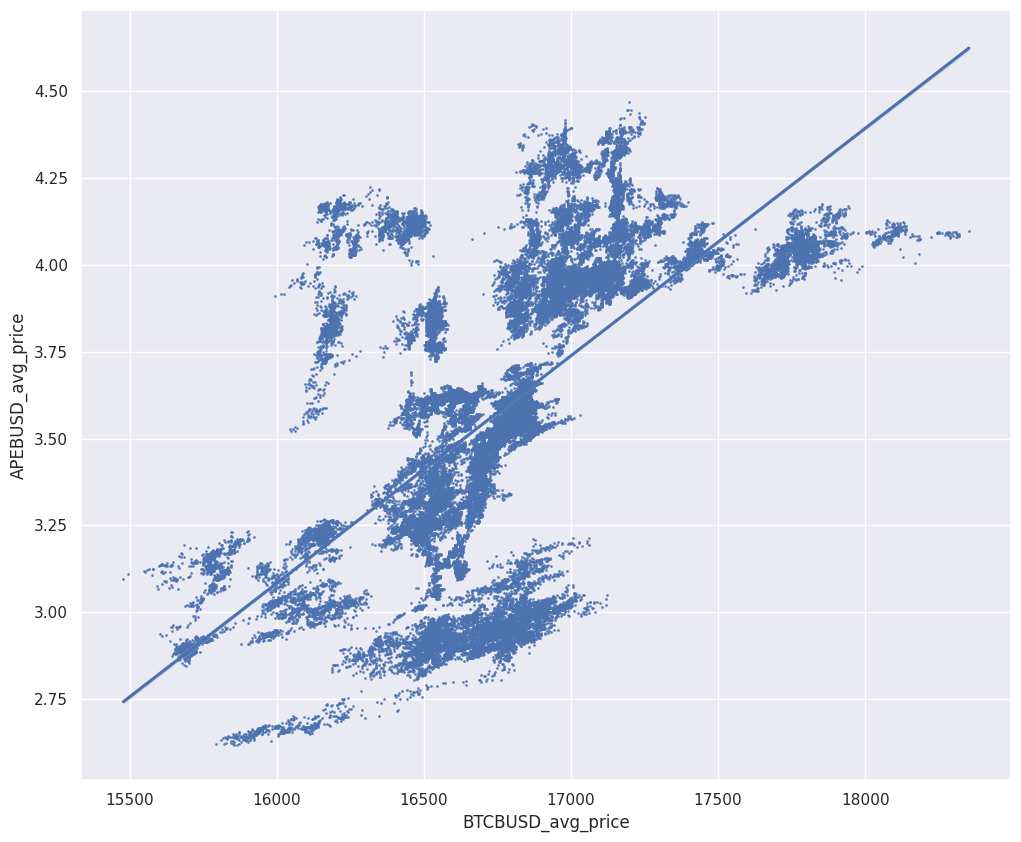

In [105]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="BTCBUSD_avg_price", y="APEBUSD_avg_price", data=df, scatter_kws={"s": 1})

<p>We can see from this plot that price is positively correlated to <b>BTCBUSD_avg_price</b> since the regression slope is positive.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of <b>ETHBUSD_avg_price</b>.</p>


<AxesSubplot:xlabel='ETHBUSD_avg_price', ylabel='APEBUSD_avg_price'>

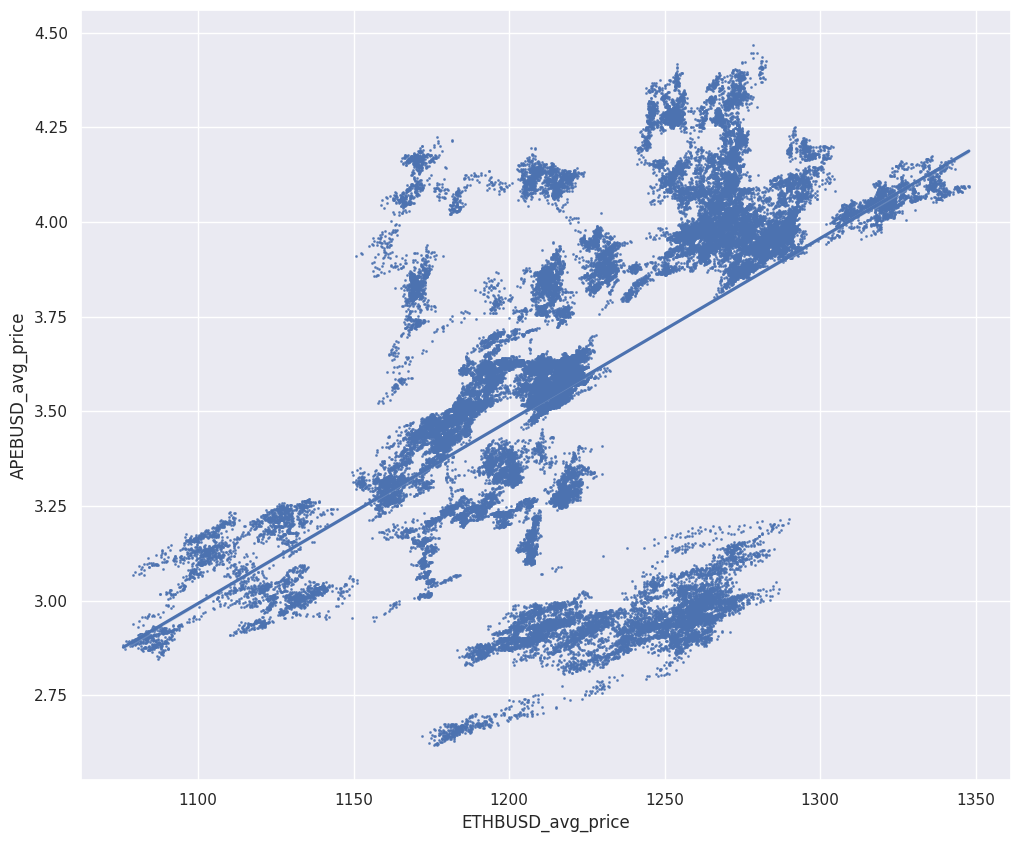

In [106]:
plt.figure(figsize=(width, height))
sns.regplot(x="ETHBUSD_avg_price", y="APEBUSD_avg_price", data=df, scatter_kws={"s": 1})

<p>Comparing the regression plot of <b>ETHBUSD_avg_price</b> and <b>BTCBUSD_avg_price</b>, we see that the points for <b>BTCBUSD_avg_price</b> are a little closer to the generated line.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #3:</h1>
<b>Given the regression plots above, is BTCBUSD_avg_price or ETHBUSD_avg_price more strongly correlated with APEBUSD_avg_price? Use the method  ".corr()" to verify your answer.</b>
</div>


In [107]:
# Write your code below and press Shift+Enter to execute 
df[["APEBUSD_avg_price", "BTCBUSD_avg_price", "ETHBUSD_avg_price"]].corr()

,APEBUSD_avg_price,BTCBUSD_avg_price,ETHBUSD_avg_price
APEBUSD_avg_price,1.000000,0.583047,0.530478
BTCBUSD_avg_price,0.583047,1.000000,0.881003
ETHBUSD_avg_price,0.530478,0.881003,1.000000


<details><summary>Click here for the solution</summary>

```python
# The variable "BTCBUSD_avg_price" has a stronger correlation with "APEBUSD_avg_price", it is approximate 0.583047   compared to "ETHBUSD_avg_price" which is approximate 0.530478 	. You can verify it using the following command:

df[["APEBUSD_avg_price", "BTCBUSD_avg_price", "ETHBUSD_avg_price"]].corr()

```

</details>


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


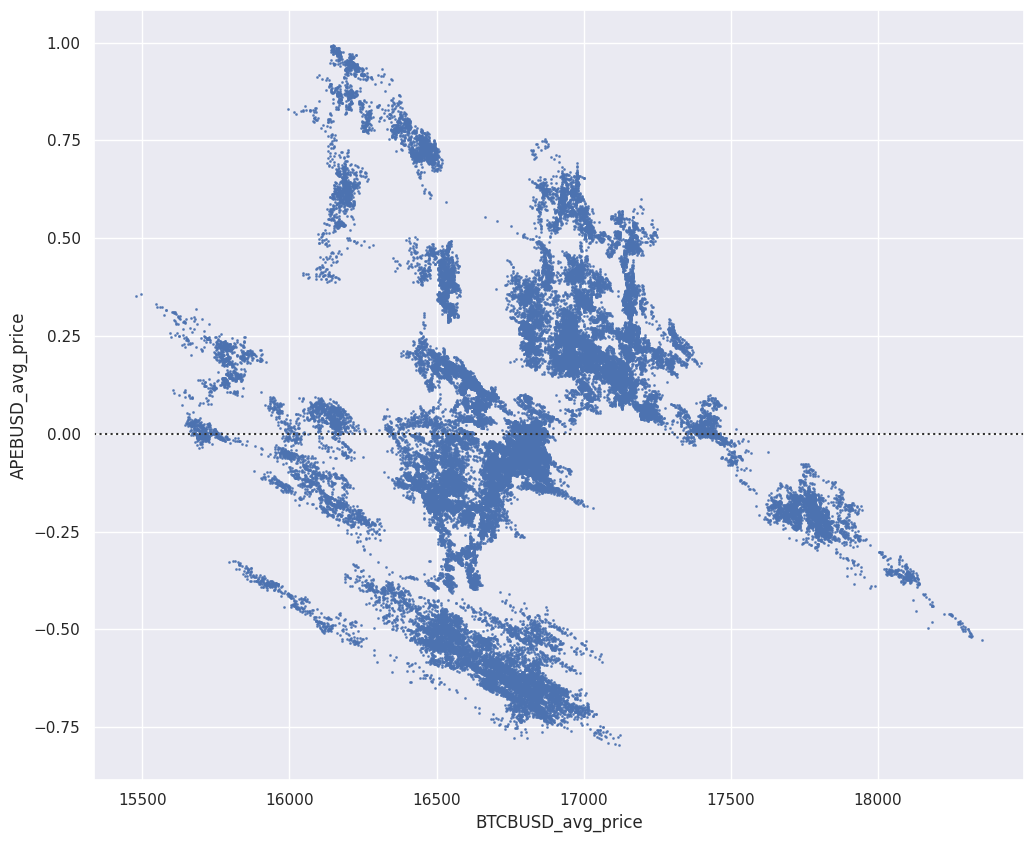

In [108]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df["BTCBUSD_avg_price"], y=df["APEBUSD_avg_price"], scatter_kws={"s": 1})
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


<h3>Multiple Linear Regression</h3>


<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


First, let's make a prediction:


In [109]:
Y_hat = lm.predict(Z)

<Figure size 1200x1000 with 0 Axes>

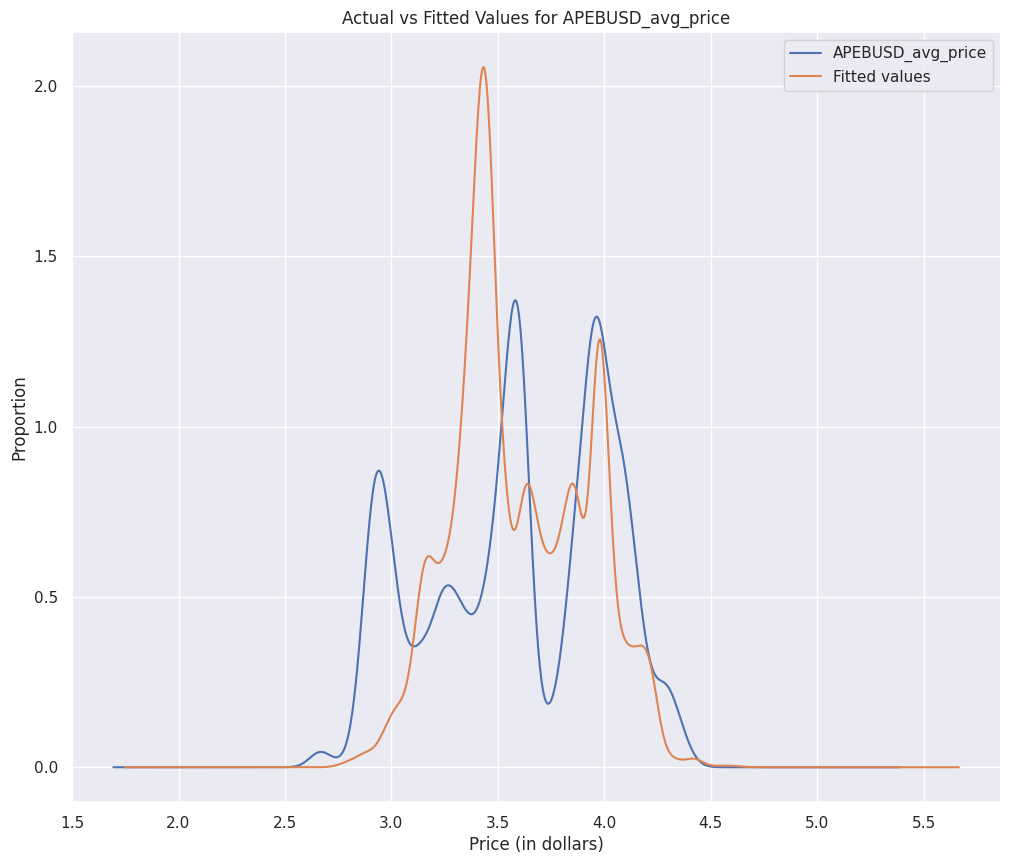

In [110]:
plt.figure(figsize=(width, height))

# sns.displot(data=df, x="APEBUSD_avg_price", color="r", kind="kde")
# sns.displot(data=Y_hat, color="b", kind="kde")

temp_df = pd.DataFrame({"APEBUSD_avg_price": df["APEBUSD_avg_price"], "Fitted values": Y_hat})
temp_df.plot.kde(figsize=(width, height))

plt.title("Actual vs Fitted Values for APEBUSD_avg_price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion")

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


<h2>3. Polynomial Regression and Pipelines</h2>


<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>


<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<p>We saw earlier that a linear model did not provide the best fit while using <b>BTCBUSD_avg_price</b> as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


<p>We will use the following function to plot the data:</p>


In [111]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(min(independent_variable)-100, max(independent_variable)+100, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, ".", x_new, y_new, "-", markersize=1)
    plt.title("Polynomial Fit with Matplotlib for Price")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("APEBUSD_avg_price")

    plt.show()
    plt.close()

Let's get the variables:


In [112]:
x = df["BTCBUSD_avg_price"]
y = df["APEBUSD_avg_price"]

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


In [113]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3             2
-4.86e-10 x + 2.458e-05 x - 0.4133 x + 2316


Let's plot the function:


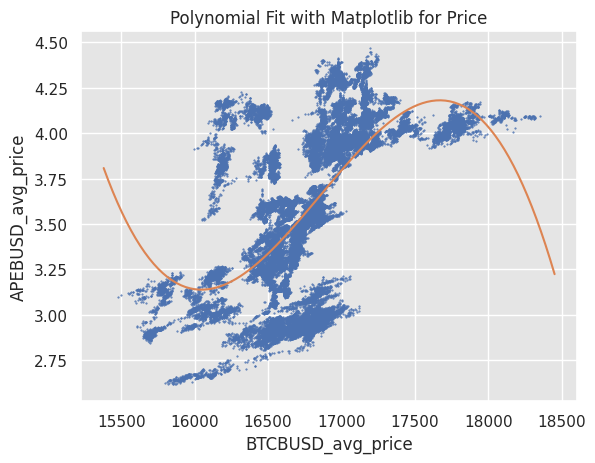

In [114]:
PlotPolly(p, x, y, "BTCBUSD_avg_price")

In [115]:
np.polyfit(x, y, 3)

array([-4.85954348e-10,  2.45763843e-05, -4.13342079e-01,  2.31552892e+03])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #4:</h1>
<b>Create 11 order polynomial model with the variables x and y from above.</b>
</div>


In [116]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# Here we use a polynomial of the 11rd orde
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, "BTCBUSD_avg_price")

```

</details>


<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>


$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


We can perform a polynomial transform on multiple features. First, we import the module:


In [117]:
from sklearn.preprocessing import PolynomialFeatures

We create a <b>PolynomialFeatures</b> object of degree 2:


In [118]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [119]:
Z_pr = pr.fit_transform(Z)

In the original data, there are 66154 samples and 4 features.


In [120]:
Z.shape

(66154, 4)

After the transformation, there are 66154 samples and 15 features.


In [121]:
Z_pr.shape

(66154, 15)

<h2>Pipeline</h2>


<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [123]:
Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(include_bias=False)), ("model", LinearRegression())]

We input the list as an argument to the pipeline constructor:


In [124]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously.


In [125]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.


In [126]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([3.16299688, 3.12467176, 3.12702439, 3.14033045])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #5:</h1>
<b>Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.</b>
</div>


In [127]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
Input = [("scale", StandardScaler()),("model", LinearRegression())]

pipe = Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

```

</details>


<h2>4. Measures for In-Sample Evaluation</h2>


<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R<sup>2</sup> / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
    <li><b>F-test score</b></li>
    <li><b>P-value</b></li>
    <li><b>Durbin-Watson test</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<p>R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. An R-squared of 100% means that all movements of a security (or another dependent variable) are completely explained by movements in the index (or the independent variable(s) you are interested in).</p>

<p>In finance, an R-Squared above 0.7 would generally be seen as showing a high level of correlation, whereas a measure below 0.4 would show a low correlation.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>

<b>F-test score</b>

<p>F-test score or Fisher criterion is a discriminant criterion function that was first presented by Fisher in 1936. It is defined by the ratio of the between-class scatter to the within-class scatter. By maximizing this criterion, one can obtain an optimal discriminant projection axis. After the sample being projected on to this projection axis, the within-class scatter is minimized and the between-class scatter is maximized.</p>

<b>P-value</b>

<p>The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

<b>Durbin-Watson test</b>

In regression analysis, Durbin-Watson (DW) is useful for checking the first-order autocorrelation (serial correlation). It analyzes the residuals for independence over time points (autocorrelation). The autocorrelation varies from -1 (negative autocorrelation) to 1 (positive autocorrelation).

Durbin-Watson test analyzes the following hypotheses,

Null hypothesis (H<sub>0</sub>): Residuals from the regression are not autocorrelated (autocorrelation coefficient, ρ = 0)
Alternative hypothesis (H<sub>a</sub>): Residuals from the regression are autocorrelated (autocorrelation coefficient, ρ > 0)

<h3>Model 1: Simple Linear Regression</h3>


Let's calculate the **R<sup>2</sup>**:


In [128]:
# BTCBUSD_avg_price_fit
lm.fit(X, Y)
# Find the R^2
print("The R-square is: %.4f" % lm.score(X, Y))

The R-square is: 0.3399


We can say that ≈ 33.99% of the variation of <b>APEBUSD_avg_price</b> is explained by this simple linear model <b>BTCBUSD_avg_price_fit</b>.


Let's calculate the **MSE**:


We can predict the output i.e., "yhat" using the predict method, where X is the input variable:


In [129]:
Yhat = lm.predict(X)
print("The output of the first four predicted value is: ", Yhat[0:4])

The output of the first four predicted value is:  [3.42183204 3.39371924 3.39686031 3.42163354]


Let's import the function <b>mean_squared_error</b> from the module <b>metrics</b>:


In [130]:
from sklearn.metrics import mean_squared_error

We can compare the predicted results with the actual results:


In [131]:
mse = mean_squared_error(df["APEBUSD_avg_price"], Yhat)
print("The mean squared error of price and predicted value is: %.4f" % mse)

The mean squared error of price and predicted value is: 0.1153


Let's import <b>scipy</b> library to calculate F-test score and P-value

In [132]:
from scipy import stats

Let's calculate <b>F-test score</b> and <b>P-value</b>

In [133]:
f_val, p_val = stats.f_oneway(Yhat, df["APEBUSD_avg_price"])
print("Results: F=", f_val, ", P =", p_val)

Results: F= 3.743115994257734e-25 , P = 1.0


Let's import **statsmodels** to get access to needed functions

In [134]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson as dwtest

Let's calculate <b>Durbin-Watson Test</b> for Simple Linear Regression

In [135]:
X_dw = df["BTCBUSD_avg_price"] # independent
y_dw = Yhat # dependent
# to get intercept
X_dw = sm.add_constant(X_dw)
# fit the regression model
reg = sm.OLS(y_dw, X_dw).fit()

In [136]:
dwtest(resids=np.array(reg.resid))

1.2151070094874703e-05

Let's remind **Durbin-Watson** for actual values

In [137]:
X_dw = df["BTCBUSD_avg_price"] # independent
y_dw = df["APEBUSD_avg_price"] # dependent
# to get intercept
X_dw = sm.add_constant(X_dw)
# fit the regression model
reg = sm.OLS(y_dw, X_dw).fit()

In [138]:
dwtest(resids=np.array(reg.resid))

0.00025670736020245386

<h3>Model 2: Multiple Linear Regression</h3>


Let's calculate the R<sup>2</sup>:


In [139]:
# fit the model 
lm.fit(Z, df["APEBUSD_avg_price"])
# Find the R^2
print("The R-squared is: %.4f" % lm.score(Z, df["APEBUSD_avg_price"]))

The R-squared is: 0.5579


We can say that ≈ 55.79 % of the variation of price is explained by this multiple linear regression "multi_fit".


Let's calculate the MSE.


We produce a prediction:


In [140]:
Y_predict_multifit = lm.predict(Z)

We compare the predicted results with the actual results:


In [141]:
print("The mean squared error of APEBUSD_avg_price and predicted value using multifit is: %.4f" \
      % mean_squared_error(df["APEBUSD_avg_price"], Y_predict_multifit))

The mean squared error of APEBUSD_avg_price and predicted value using multifit is: 0.0772


Let's calculate <b>F-test score</b> and <b>P-value</b>

In [142]:
f_val, p_val = stats.f_oneway(Y_predict_multifit, df["APEBUSD_avg_price"])
print("Results: F=", f_val, ", P =", p_val)

Results: F= 3.2123266595457853e-24 , P = 1.0


Let's calculate <b>Durbin-Watson Test</b> for Simple Linear Regression

In [143]:
X_dw = df["BTCBUSD_avg_price"] # independent
y_dw = Y_predict_multifit # dependent
# to get intercept
X_dw = sm.add_constant(X_dw)
# fit the regression model
reg = sm.OLS(y_dw, X_dw).fit()

In [144]:
dwtest(resids=np.array(reg.resid))

0.0004679495786336592

<h3>Model 3: Polynomial Fit</h3>


Let's calculate the R<sup>2</sup>.


Let’s import the function <b>r2\_score</b> from the module <b>metrics</b> as we are using a different function.


In [145]:
from sklearn.metrics import r2_score

We apply the function to get the value of R<sup>2</sup>:


In [146]:
r_squared = r2_score(y, p(x))
print("The R-square value is: %.4f" % r_squared)

The R-square value is: 0.3792


We can say that ≈ 37.92 % of the variation of "APEBUSD_avg_price" is explained by this polynomial fit.


<h3>MSE</h3>


We can also calculate the MSE:


In [147]:
print("The mean squared error is: %.4f" \
      % mean_squared_error(df["APEBUSD_avg_price"], p(x)))

The mean squared error is: 0.1084


Let's calculate <b>F-test score</b> and <b>P-value</b>

In [148]:
f_val, p_val = stats.f_oneway(p(x), df["APEBUSD_avg_price"])
print("Results: F=", f_val, ", P =", p_val)

Results: F= 5.6159840013017685e-18 , P = 1.0


Let's calculate <b>Durbin-Watson Test</b> for Simple Linear Regression

In [149]:
X_dw = df["BTCBUSD_avg_price"] # independent
y_dw = p(x) # dependent
# to get intercept
X_dw = sm.add_constant(X_dw)
# fit the regression model
reg = sm.OLS(y_dw, X_dw).fit()

In [150]:
dwtest(resids=np.array(reg.resid))

0.003894630744024263

<h2>5. Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


In [151]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input:


In [152]:
new_input = np.arange(min(df["BTCBUSD_avg_price"]), max(df["BTCBUSD_avg_price"]), 10).reshape(-1, 1)
new_input

array([[15479.29012641],
       [15489.29012641],
       [15499.29012641],
       [15509.29012641],
       [15519.29012641],
       [15529.29012641],
       [15539.29012641],
       [15549.29012641],
       [15559.29012641],
       [15569.29012641],
       [15579.29012641],
       [15589.29012641],
       [15599.29012641],
       [15609.29012641],
       [15619.29012641],
       [15629.29012641],
       [15639.29012641],
       [15649.29012641],
       [15659.29012641],
       [15669.29012641],
       [15679.29012641],
       [15689.29012641],
       [15699.29012641],
       [15709.29012641],
       [15719.29012641],
       [15729.29012641],
       [15739.29012641],
       [15749.29012641],
       [15759.29012641],
       [15769.29012641],
       [15779.29012641],
       [15789.29012641],
       [15799.29012641],
       [15809.29012641],
       [15819.29012641],
       [15829.29012641],
       [15839.29012641],
       [15849.29012641],
       [15859.29012641],
       [15869.29012641],


Fit the model:


In [153]:
lm.fit(X, Y)
lm

LinearRegression()

Produce a prediction:


In [154]:
yhat = lm.predict(new_input)
yhat[0:5]

array([2.74294401, 2.7494874 , 2.75603078, 2.76257417, 2.76911756])

We can plot the data:


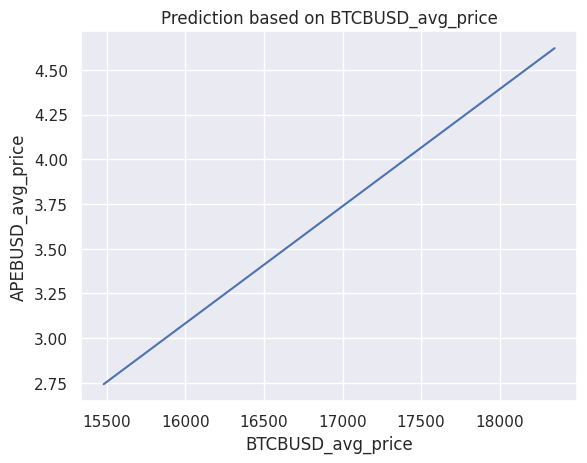

In [155]:
plt.plot(new_input, yhat)
plt.title("Prediction based on BTCBUSD_avg_price")
plt.xlabel("BTCBUSD_avg_price")
plt.ylabel("APEBUSD_avg_price")
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<ul>
    <li><i>What is a good F-test score?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest F-test value is a better fit</b> for the data.</p>

<ul>
    <li><i>What is a good P-value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher P-value is a better fit</b> for the data.</p>

<ul>
    <li><i>What is a good Durbin-Watson Test?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with a value closer to 2 is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>We prefer R-squared, MSE when comparing models. Simple Linear Regression: Using <b>BTCBUSD_avg_price</b> as a Predictor Variable of <b>APEBUSD_avg_price</b>.
<ul>
    <li><b>R-squared</b>: 0.3399</li>
    <li><b>MSE</b>: 0.1152</li>
    <li><b>F-test score</b>: 3.74 * 10<sup>-25</sup></li>
    <li><b>P-value</b>: 1.0</li>
    <li><b>Durbin-Watson test</b>: 0.00025670736020245386</li>
</ul>
</p>

<p>Multiple Linear Regression: Using <b>BTCBUSD_avg_price</b>, <b>ETHBUSD_avg_price</b>, <b>XRPBUSD_avg_price</b> and <b>DOGEBUSD_avg_price</b> as Predictor Variables <b>APEBUSD_avg_price</b>.
<ul>
    <li><b>R-squared</b>: 0.5579</li>
    <li><b>MSE</b>: 0.0772</li>
    <li><b>F-test score</b>: 3.21 * 10<sup>-24</sup></li>
    <li><b>P-value</b>: 1.0</li>
    <li><b>Durbin-Watson test</b>: 0.0004679495786336592</li>
</ul>
</p>

<p>Polynomial Fit: <b>BTCBUSD_avg_price</b> as a Predictor Variable of <b>APEBUSD_avg_price</b>.
<ul>
    <li><b>R-squared</b>: 0.3791</li>
    <li><b>MSE</b>: 0.1084</li>
    <li><b>F-test score</b>:  5.61 * 10<sup>-18</sup></li>
    <li><b>P-value</b>: 1.0</li>
    <li><b>Durbin-Watson test</b>: 0.003894630744024263</li>
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>


<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R<sup>2</sup>.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is 0.1152 while MLR has an MSE of 0.0772.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (≈ 0.3399) is smaller compared to the R-squared for the MLR (≈ 0.5579).</li>
    <li><b>F-test</b>: F-test of SLR is smaller than F-test of MLR</li>
    <li><b>P-value</b>: Equal</li>
    <li><b>Durbin-Watson score</b>: Durbin-Watson score of MLR is closer to 2 than SLR</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
    <li><b>F-test</b>: F-test of SLR is smaller than F-test of Polynomial fit</li>
    <li><b>P-value</b>: Equal</li>
    <li><b>Durbin-Watson score</b>: Durbin-Watson score of Polynomial fit is closer to 2 than SLR</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting <b>APEBUSD_avg_price</b> with <b>BTCBUSD_avg_price</b> as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is larger than for the Polynomial Fit.</li>
    <li><b>F-test</b>: F-test of MLR is smaller than F-test of Polynomial fit</li>
    <li><b>P-value</b>: Equal</li>
    <li><b>Durbin-Watson score</b>: Durbin-Watson score of Polynomial fit is closer to 2 than MLR</li>
</ul>


<h2>Conclusion</h2>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict <b>APEBUSD_avg_price</b> from our dataset. This result makes sense since we have 8 cryptocurrencies (including <b>APEBUSD_avg_price</b>) in total and we know that more than one of those cryptocurrencies are potential predictors of <b>APEBUSD_avg_price</b>.</p>

### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                            |
| ----------------- | ------- | ---------- | --------------------------------------------- |
| 2020-10-30        | 2.2     | Lakshmi    | Changed url of csv                            |
| 2020-09-09        | 2.1     | Lakshmi    | Fixes made in Polynomial Regression Equations |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
